In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datasets = ['sift1m', 'gist1m', 'deep1m']

indices = ['hnsw', 'vamana', 'hcnng']

colors = ['purple', 'steelblue', 'green', 'orange', 'tomato']

num_datasets = len(datasets)

num_indices = len(indices)

output = '../output/partition/'

figures = '../figures/partition/'

In [3]:
import os
os.makedirs(figures, exist_ok=True)

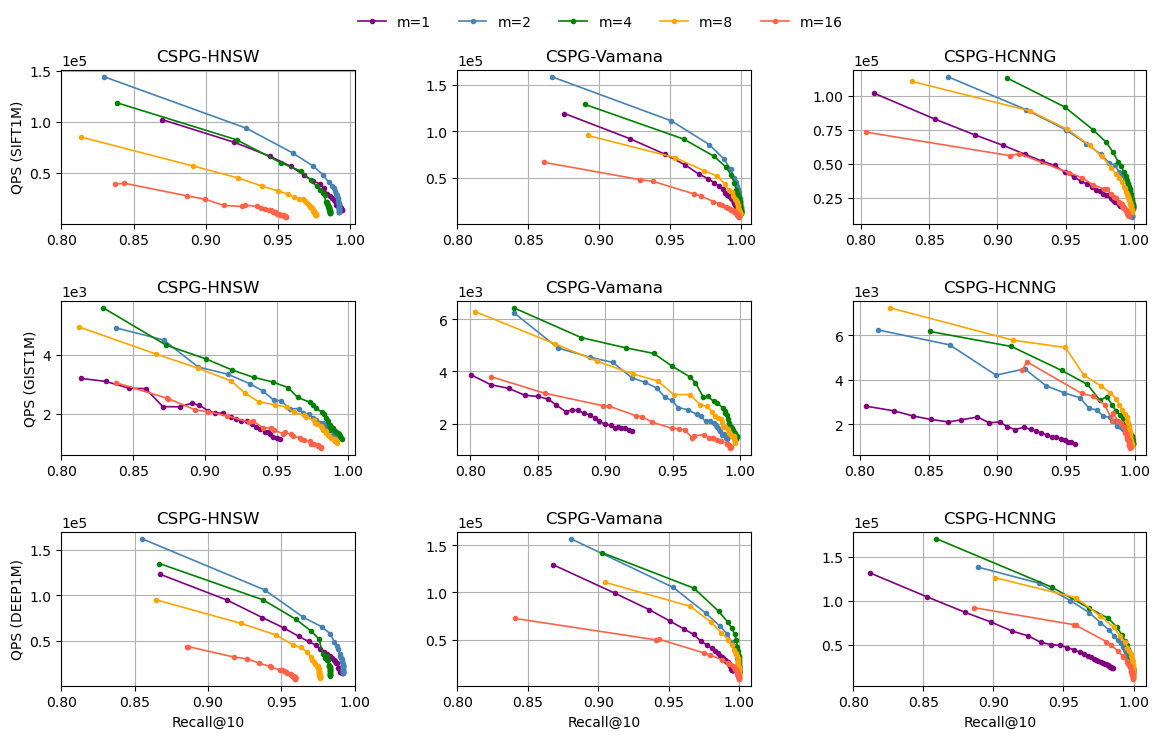

In [4]:
k = 10

low_recall = 0.8

gap_recall = 0.05

num_partitions = [1, 2, 4, 8, 16]
num_partitions_ = [f'$2^{{{i}}}$' for i in range(5)]

fig, axes = plt.subplots(nrows = num_datasets, ncols = num_indices, 
  figsize=(14, 8))
for i in range(num_datasets):
  ds = datasets[i]
  axes[i][0].set_ylabel(f'QPS ({ds.upper()})')
  for j in range(num_indices):
    idx = indices[j]
    csv = pd.read_csv(f'{output}{ds}_{idx}.csv')
    csv['qps'] = csv['num_queries'] / csv['query_time']
    for p, color in zip(num_partitions, colors):
      local = csv[csv['num_partition']==p]
      local = local[local['recall'] > low_recall]
      axes[i][j].plot(local['recall'], local['qps'], color=color, marker='o', linewidth=1.2, markersize=3)
    axes[i][j].grid(True)
    axes[i][j].set_xticks(np.arange(low_recall, 1.001, gap_recall))
    axes[i][j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[i][j].set_title(f"CSPG-{idx.upper() if idx != 'vamana' else 'Vamana'}")

for j in range(num_indices):
  axes[num_datasets-1][j].set_xlabel(f'Recall@{k}')

fig.subplots_adjust(wspace=0.35, hspace=0.5)
fig.legend([f'm={p}' for p in num_partitions],
  loc='center', bbox_to_anchor=(0.51, 0.94), ncol=num_indices * 2, frameon=False)
fig.savefig(f'{figures}partition.pdf', bbox_inches='tight', pad_inches=0)
fig.show()

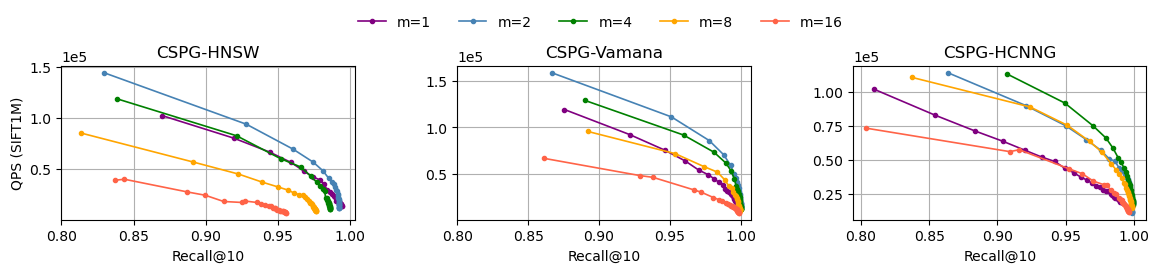

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = num_indices, 
  figsize=(14, 2))

ds = datasets[0]
axes[0].set_ylabel(f'QPS ({ds.upper()})')
for j in range(num_indices):
  idx = indices[j]
  csv = pd.read_csv(f'{output}{ds}_{idx}.csv')
  csv['qps'] = csv['num_queries'] / csv['query_time']
  for p, color in zip(num_partitions, colors):
    local = csv[csv['num_partition']==p]
    local = local[local['recall'] > low_recall]
    axes[j].plot(local['recall'], local['qps'], color=color, marker='o', linewidth=1.2, markersize=3)
  axes[j].grid(True)
  axes[j].set_xticks(np.arange(low_recall, 1.001, gap_recall))
  axes[j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  axes[j].set_title(f"CSPG-{idx.upper() if idx != 'vamana' else 'Vamana'}")

for j in range(num_indices):
  axes[j].set_xlabel(f'Recall@{k}')

fig.subplots_adjust(wspace=0.35, hspace=0.5)
fig.legend([f'm={p}' for p in num_partitions],
  loc='center', bbox_to_anchor=(0.51, 1.1), ncol=num_indices * 2, frameon=False)
fig.savefig(f'{figures}partition_small.pdf', bbox_inches='tight', pad_inches=0)
fig.show()